# 토큰화

## spaCy 사용하기

In [1]:
import spacy

In [2]:
en_text = "A Dog Run back corner near spare bedrooms"

In [3]:
spacy_en = spacy.load("en_core_web_sm")

In [4]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [5]:
tokenize(en_text)

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']

## NLTK 사용하기

In [6]:
import nltk

In [7]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiweo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.tokenize import word_tokenize

In [9]:
word_tokenize(en_text)

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']

## 한국어 토큰화

### 형태소 토큰화

In [10]:
!pip install konlpy
!pip install mecab-python

In [11]:
from konlpy.tag import Okt

In [12]:
ko_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [13]:
okt = Okt()

In [14]:
okt.morphs(ko_text)

['사과',
 '의',
 '놀라운',
 '효능',
 '이라는',
 '글',
 '을',
 '봤어',
 '.',
 '그래서',
 '오늘',
 '사과',
 '를',
 '먹으려고',
 '했는데',
 '사과',
 '가',
 '썩어서',
 '슈퍼',
 '에',
 '가서',
 '사과',
 '랑',
 '오렌지',
 '사왔어']

위에서 단어 또는 형태소 토큰화를 했는데 그보다 더 작은 단위인 문자 단위로 토큰화 하는 경우도 있다.

In [15]:
list(en_text)

['A',
 ' ',
 'D',
 'o',
 'g',
 ' ',
 'R',
 'u',
 'n',
 ' ',
 'b',
 'a',
 'c',
 'k',
 ' ',
 'c',
 'o',
 'r',
 'n',
 'e',
 'r',
 ' ',
 'n',
 'e',
 'a',
 'r',
 ' ',
 's',
 'p',
 'a',
 'r',
 'e',
 ' ',
 'b',
 'e',
 'd',
 'r',
 'o',
 'o',
 'm',
 's']

# 단어 집합(Vocabulary) 생성

In [16]:
import urllib.request

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk import FreqDist

In [18]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",
    filename="../input/ratings.txt",
)
data = pd.read_table("../input/ratings.txt")  # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [19]:
sample_data = data[:100]

In [20]:
sample_data["document"] = sample_data["document"].str.replace(
    "[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True
)  # 한글과 공백 제외 모두 제거
sample_data[:10]

C:\Users\jiweo\AppData\Local\Temp\ipykernel_6984\3031624743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data["document"] = sample_data["document"].str.replace(


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [21]:
# 불용어 정의
stopwords = [
    "의",
    "가",
    "이",
    "은",
    "들",
    "는",
    "좀",
    "잘",
    "걍",
    "과",
    "도",
    "를",
    "으로",
    "자",
    "에",
    "와",
    "한",
    "하다",
]

In [27]:
from konlpy.tag import Mecab

In [30]:
tokenizer = Mecab(dicpath="C:/MeCab/mecab-ko-dic")

In [31]:
tokenized = []
for sentence in sample_data["document"]:
    temp = tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    tokenized.append(temp)

tokenized[:10]

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '해',
  '문화',
  '산업',
  '부러웠',
  '는데',
  '사실',
  '우리',
  '나라',
  '에서',
  '그',
  '어려운',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지킨',
  '노라노',
  '같',
  '전통',
  '있',
  '어',
  '저',
  '같',
  '사람',
  '꿈',
  '을',
  '꾸',
  '고',
  '이뤄나갈',
  '수',
  '있',
  '다는',
  '것',
  '감사',
  '합니다'],
 ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'],
 ['연기',
  '진짜',
  '개',
  '쩔',
  '구나',
  '지루',
  '할거',
  '라고',
  '생각',
  '했',
  '는데',
  '몰입',
  '해서',
  '봤',
  '다',
  '그래',
  '이런',
  '게',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'],
 ['사랑',
  '을',
  '해',
  '본',
  '사람',
  '라면',
  '처음',
  '부터',
  '끝',
  '까지',
  '웃',
  '을',
  '수',
  '있',
  '영화'],
 ['완전', '감동', '입니다', '다시', '봐도', '감동'],
 ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'],
 ['굿'],
 ['바보', '아니', '라', '병', '쉰', '인', '듯']]

In [32]:
vocab = FreqDist(np.hstack(tokenized))
len(vocab)

664

In [33]:
vocab["재밌"]

10

In [34]:
vocab_size = 500
vocab = vocab.most_common(vocab_size)
len(vocab)

500

# 각 단어에 고유한 정수 부여

In [35]:
word_to_index = {word[0]: index + 2 for index, word in enumerate(vocab)}
word_to_index["pad"] = 1  # 패딩용 인덱스
word_to_index["unk"] = 0  # 단어 집합에 없는 단어를 위한 인덱스

In [36]:
encoded = []
for line in tokenized:
    temp = []
    for w in line:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index["unk"])

    encoded.append(temp)

In [37]:
encoded[:10]

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29],
 [188,
  5,
  80,
  189,
  190,
  191,
  42,
  192,
  114,
  5,
  193,
  194,
  21,
  115,
  195,
  196,
  13,
  51,
  81,
  116,
  30,
  42,
  197,
  117,
  118,
  31,
  198,
  5,
  199,
  200,
  17,
  114,
  7,
  82,
  52,
  17,
  43,
  201,
  5,
  202,
  4,
  203,
  14,
  7,
  83,
  32,
  204,
  84],
 [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11],
 [44,
  33,
  120,
  210,
  211,
  212,
  213,
  68,
  45,
  34,
  13,
  214,
  121,
  15,
  2,
  215,
  69,
  8,
  33,
  3,
  35],
 [216, 217, 218, 219, 7, 220, 17, 3],
 [122, 5, 21, 36, 43, 123, 124, 53, 118, 31, 85, 5, 14, 7, 3],
 [125, 37, 221, 41, 79, 37],
 [120, 222, 55, 223, 55, 86, 224, 46, 9, 4, 47, 25],
 [56],
 [225, 87, 88, 226, 227, 57, 89]]

# 길이가 다른 문장들을 동일한 길이로 바꿔주는 패딩

리뷰 최대 길이: 63
리뷰 최소 길이: 1
리뷰 평균 길이: 13.9


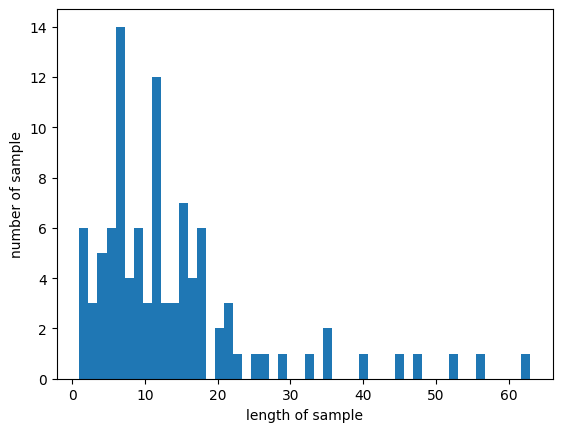

In [38]:
max_len = max(len(l) for l in encoded)
print(
    (
        f"리뷰 최대 길이: {max_len}\n"
        f"리뷰 최소 길이: {min(len(l) for l in encoded)}\n"
        f"리뷰 평균 길이: {sum(map(len, encoded))/len(encoded)}"
    )
)
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel("length of sample")
plt.ylabel("number of sample")
plt.show()

In [39]:
for line in encoded:
    if len(line) < max_len:
        line += [word_to_index["pad"]] * (max_len - len(line))

In [40]:
print(
    (
        f"리뷰 최대 길이: {max_len}\n"
        f"리뷰 최소 길이: {min(len(l) for l in encoded)}\n"
        f"리뷰 평균 길이: {sum(map(len, encoded))/len(encoded)}"
    )
)

리뷰 최대 길이: 63
리뷰 최소 길이: 63
리뷰 평균 길이: 63.0


In [41]:
encoded[:3]

[[78,
  27,
  9,
  4,
  50,
  41,
  79,
  16,
  28,
  29,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [188,
  5,
  80,
  189,
  190,
  191,
  42,
  192,
  114,
  5,
  193,
  194,
  21,
  115,
  195,
  196,
  13,
  51,
  81,
  116,
  30,
  42,
  197,
  117,
  118,
  31,
  198,
  5,
  199,
  200,
  17,
  114,
  7,
  82,
  52,
  17,
  43,
  201,
  5,
  202,
  4,
  203,
  14,
  7,
  83,
  32,
  204,
  84,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [205,
  119,
  206,
  53,
  207,
  31,
  208,
  209,
  54,
  10,
  25,
  11,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1

이렇게 매핑한 각 정수를 고유한 단어 벡터로 바꾸는 작업이 필요하다. 그 방법으로는 크게 원-핫 인코딩과 워드 임베딩이 있는데 주로 워드 임베딩이 사용된다.